In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Flight_Details_Aggrigated.csv')
df

,Unnamed: 0,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date
0,0,Aug 15,SpiceJet,12:35 AM,3:00 AM,2 hr 25 min,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,"₹5,365",20 July 2022
1,1,Aug 15,GO FIRST,8:05 AM,10:15 AM,2 hr 10 min,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,"₹5,390",20 July 2022
2,2,Aug 15,Vistara,7:30 AM,9:35 AM,2 hr 5 min,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,"₹5,717",20 July 2022
3,3,Aug 15,AirAsia (India),3:25 PM,11:10 PM,7 hr 45 min,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,"₹5,164",20 July 2022
4,4,Aug 15,GO FIRST,6:00 AM,8:05 AM,2 hr 5 min,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,"₹5,390",20 July 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,787,Aug 15,Gulf Air,4:45 AM,8:50 PM,16 hr 5 min,BLR–DEL,1 stop,BAH,7 hr 5 min,473 kg CO2,+298% emissions,"₹54,537",20 July 2022
6119,788,Aug 15,Emirates,10:35 AM,2:45 AM+1,16 hr 10 min,BLR–DEL,1 stop,DXB,9 hr 15 min,367 kg CO2,+208% emissions,"₹63,854",20 July 2022
6120,789,Aug 15,Emirates,10:35 AM,8:20 PM,9 hr 45 min,BLR–DEL,1 stop,DXB,2 hr 40 min,367 kg CO2,+208% emissions,"₹67,813",20 July 2022
6121,790,Aug 15,Etihad,4:40 AM,7:30 PM,14 hr 50 min,BLR–DEL,1 stop,AUH,7 hr 30 min,"1,334 kg CO2","+1,023% emissions","₹75,389",20 July 2022


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.isnull().sum()

Date               0
Airline            0
Departure          0
Arrival            0
Duration           0
Route              0
Stops              0
Layover            0
Layover_Time       0
Co2                0
Emissions          0
Price              0
Data Scrap Date    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6123 entries, 0 to 6122
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             6123 non-null   object
 1   Airline          6123 non-null   object
 2   Departure        6123 non-null   object
 3   Arrival          6123 non-null   object
 4   Duration         6123 non-null   object
 5   Route            6123 non-null   object
 6   Stops            6123 non-null   object
 7   Layover          6123 non-null   object
 8   Layover_Time     6123 non-null   object
 9   Co2              6123 non-null   object
 10  Emissions        6123 non-null   object
 11  Price            6123 non-null   object
 12  Data Scrap Date  6123 non-null   object
dtypes: object(13)
memory usage: 622.0+ KB


In [8]:
for i in range(len(df)):
    df['Price'][i] = df['Price'][i].replace(',','')
    df['Price'][i] = df['Price'][i].replace('₹','')

In [9]:
df['Price'] = df['Price'].astype('int')

In [10]:
df

,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date
0,Aug 15,SpiceJet,12:35 AM,3:00 AM,2 hr 25 min,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,20 July 2022
1,Aug 15,GO FIRST,8:05 AM,10:15 AM,2 hr 10 min,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,20 July 2022
2,Aug 15,Vistara,7:30 AM,9:35 AM,2 hr 5 min,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,20 July 2022
3,Aug 15,AirAsia (India),3:25 PM,11:10 PM,7 hr 45 min,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,20 July 2022
4,Aug 15,GO FIRST,6:00 AM,8:05 AM,2 hr 5 min,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,20 July 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,Aug 15,Gulf Air,4:45 AM,8:50 PM,16 hr 5 min,BLR–DEL,1 stop,BAH,7 hr 5 min,473 kg CO2,+298% emissions,54537,20 July 2022
6119,Aug 15,Emirates,10:35 AM,2:45 AM+1,16 hr 10 min,BLR–DEL,1 stop,DXB,9 hr 15 min,367 kg CO2,+208% emissions,63854,20 July 2022
6120,Aug 15,Emirates,10:35 AM,8:20 PM,9 hr 45 min,BLR–DEL,1 stop,DXB,2 hr 40 min,367 kg CO2,+208% emissions,67813,20 July 2022
6121,Aug 15,Etihad,4:40 AM,7:30 PM,14 hr 50 min,BLR–DEL,1 stop,AUH,7 hr 30 min,"1,334 kg CO2","+1,023% emissions",75389,20 July 2022


In [11]:
df['Duration_Hrs'] = 0
df['Duration_Mins'] = 0
for i in range(len(df)):
    try:
        df['Duration_Hrs'][i] = df['Duration'][i].split('hr')[0]
        df['Duration_Mins'][i] = df['Duration'][i].split('hr')[1]
    except:
        df['Duration_Mins'][i] = df['Duration'][i]

In [12]:
df['Duration_Mins'] = df['Duration_Mins'].str.replace(' min','')

In [13]:
for i in range(len(df)):
    try:
        df['Duration_Hrs'][i]= df['Duration_Hrs'][i].strip()
        df['Duration_Mins'][i]= df['Duration_Mins'][i].strip()
    except:
        pass

In [14]:
df['Duration_Hrs'].unique()

array([ 2,  7, 10,  4,  6,  8, 12,  1,  5,  9, 25, 11,  3, 14, 15, 27, 13,
       23, 26, 28, 17, 20, 18, 24, 16, 29, 19, 22, 30, 21, 32, 36, 31],
      dtype=int64)

In [15]:
df['Duration_Hrs'] = df['Duration_Hrs'].replace(['45 min','55 min', '50 min'],0)

In [16]:
df['Duration_Hrs'].unique()

array([ 2,  7, 10,  4,  6,  8, 12,  1,  5,  9, 25, 11,  3, 14, 15, 27, 13,
       23, 26, 28, 17, 20, 18, 24, 16, 29, 19, 22, 30, 21, 32, 36, 31],
      dtype=int64)

In [17]:
df['Duration_Hrs'] = (df['Duration_Hrs'].astype('int'))*60

In [18]:
df['Duration_Mins'] = df['Duration_Mins'].replace('',0)

In [19]:
df['Duration_Mins'].unique()

array([' 25', ' 10', ' 5', ' 45', ' 15', ' 20', ' 50', ' 35', 0, ' 30',
       ' 55', ' 40'], dtype=object)

In [20]:
df['Duration_Mins'] = df['Duration_Mins'].astype('int')

In [21]:
df['Duration'] = df['Duration_Hrs']+df['Duration_Mins']

In [22]:
df.drop(['Duration_Hrs','Duration_Mins'],axis=1,inplace=True)

In [23]:
df['Layover'].unique()

array(['-', 'JAI', 'AMD', 'NAG', 'IXR', 'BLR', 'BDQ', 'SXR', 'PAT', 'BHO',
       'IDR', 'IXU', 'IXC', 'LKO', 'DED', 'VNS', 'GOP', 'HYD', 'ATQ',
       'DBR', 'RPR', 'CCU', 'MAA', 'RAJ', 'IXJ', 'BBI', 'JDH', 'GOI',
       'UDR', 'CJB', 'COK', 'CMB', 'MCT', 'DXB', 'JED', 'KWI', 'BKK',
       'BAH', 'AUH', 'KUL', 'DOH', 'KQH', 'CCJ', 'RUH', 'KTM', 'JLR',
       'JRG', 'VTZ', 'PNQ', 'GAU', 'IXB', 'BOM'], dtype=object)

In [24]:
International = ['MCT','DXB','CMB','KUL','BAH','DOH','BKK','AUH','SIN','KWI','KTM','JED','min','RUH']

In [25]:
for airports in International:
    df = df[df['Layover'] != airports]

In [26]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date
0,Aug 15,SpiceJet,12:35 AM,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,20 July 2022
1,Aug 15,GO FIRST,8:05 AM,10:15 AM,130,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,20 July 2022
2,Aug 15,Vistara,7:30 AM,9:35 AM,125,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,20 July 2022
3,Aug 15,AirAsia (India),3:25 PM,11:10 PM,465,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,20 July 2022
4,Aug 15,GO FIRST,6:00 AM,8:05 AM,125,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,20 July 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,Aug 15,AirAsia (India),6:15 PM,9:10 PM,175,BLR–DEL,Nonstop,-,-,95 kg CO2,-19% emissions,20569,20 July 2022
5422,Aug 15,SpiceJet,6:05 AM,6:15 PM,730,BLR–DEL,1 stop,IXB,6 hr 45 min,233 kg CO2,+95% emissions,20690,20 July 2022
5423,Aug 15,Vistara,12:45 PM,12:40 AM+1,715,BLR–DEL,1 stop,GOI,7 hr 50 min,172 kg CO2,+44% emissions,21994,20 July 2022
5424,Aug 15,AirAsia (India),10:55 AM,9:45 PM,650,BLR–DEL,1 stop,COK,6 hr 40 min,182 kg CO2,+53% emissions,22325,20 July 2022


In [27]:
for i in range(len(df)):
    df['Date'][i] = pd.to_datetime(df['Date'][i] + ' 2022')

In [28]:
for i in range(len(df)):
    df['Data Scrap Date'][i] = pd.to_datetime(df['Data Scrap Date'][i])

In [29]:
df['Booking_Travel_Date_Difference'] = 0

In [30]:
df

,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date,Booking_Travel_Date_Difference
0,2022-08-15 00:00:00,SpiceJet,12:35 AM,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,2022-07-20 00:00:00,0
1,2022-08-15 00:00:00,GO FIRST,8:05 AM,10:15 AM,130,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,2022-07-20 00:00:00,0
2,2022-08-15 00:00:00,Vistara,7:30 AM,9:35 AM,125,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,2022-07-20 00:00:00,0
3,2022-08-15 00:00:00,AirAsia (India),3:25 PM,11:10 PM,465,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,2022-07-20 00:00:00,0
4,2022-08-15 00:00:00,GO FIRST,6:00 AM,8:05 AM,125,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,2022-07-20 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,2022-08-15 00:00:00,AirAsia (India),6:15 PM,9:10 PM,175,BLR–DEL,Nonstop,-,-,95 kg CO2,-19% emissions,20569,2022-07-20 00:00:00,0
5422,2022-08-15 00:00:00,SpiceJet,6:05 AM,6:15 PM,730,BLR–DEL,1 stop,IXB,6 hr 45 min,233 kg CO2,+95% emissions,20690,2022-07-20 00:00:00,0
5423,2022-08-15 00:00:00,Vistara,12:45 PM,12:40 AM+1,715,BLR–DEL,1 stop,GOI,7 hr 50 min,172 kg CO2,+44% emissions,21994,2022-07-20 00:00:00,0
5424,2022-08-15 00:00:00,AirAsia (India),10:55 AM,9:45 PM,650,BLR–DEL,1 stop,COK,6 hr 40 min,182 kg CO2,+53% emissions,22325,2022-07-20 00:00:00,0


In [31]:
df['Booking_Travel_Date_Difference'] = df['Date']-df['Data Scrap Date']

In [32]:
df['Booking_Travel_Date_Difference'] = df['Booking_Travel_Date_Difference'].astype('timedelta64[D]').astype(int)

In [33]:
df = df[df['Booking_Travel_Date_Difference']<=60]

In [34]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date,Booking_Travel_Date_Difference
0,2022-08-15 00:00:00,SpiceJet,12:35 AM,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,2022-07-20 00:00:00,26
1,2022-08-15 00:00:00,GO FIRST,8:05 AM,10:15 AM,130,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,2022-07-20 00:00:00,26
2,2022-08-15 00:00:00,Vistara,7:30 AM,9:35 AM,125,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,2022-07-20 00:00:00,26
3,2022-08-15 00:00:00,AirAsia (India),3:25 PM,11:10 PM,465,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,2022-07-20 00:00:00,26
4,2022-08-15 00:00:00,GO FIRST,6:00 AM,8:05 AM,125,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,2022-07-20 00:00:00,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,2022-08-15 00:00:00,AirAsia (India),6:15 PM,9:10 PM,175,BLR–DEL,Nonstop,-,-,95 kg CO2,-19% emissions,20569,2022-07-20 00:00:00,26
5422,2022-08-15 00:00:00,SpiceJet,6:05 AM,6:15 PM,730,BLR–DEL,1 stop,IXB,6 hr 45 min,233 kg CO2,+95% emissions,20690,2022-07-20 00:00:00,26
5423,2022-08-15 00:00:00,Vistara,12:45 PM,12:40 AM+1,715,BLR–DEL,1 stop,GOI,7 hr 50 min,172 kg CO2,+44% emissions,21994,2022-07-20 00:00:00,26
5424,2022-08-15 00:00:00,AirAsia (India),10:55 AM,9:45 PM,650,BLR–DEL,1 stop,COK,6 hr 40 min,182 kg CO2,+53% emissions,22325,2022-07-20 00:00:00,26


In [35]:
df['Dept_day_of_Week'] = ' '
for i in range(len(df)):
    temp = pd.Timestamp(df['Date'][i])
    df['Dept_day_of_Week'][i] = temp.day_name()
df.sample(5)

,Date,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Data Scrap Date,Booking_Travel_Date_Difference,Dept_day_of_Week
965,2022-08-15 00:00:00,SpiceJet,12:35 AM,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,2022-07-20 00:00:00,26,Monday
3314,2022-08-17 00:00:00,IndiGo,3:10 PM,5:20 PM,130,DEL–BOM,Nonstop,-,-,86 kg CO2,-9% emissions,5408,2022-07-20 00:00:00,28,Wednesday
128,2022-08-15 00:00:00,Air India,8:10 PM,8:55 AM+1,765,BOM–DEL,1 stop,HYD,9 hr,195 kg CO2,+104% emissions,11718,2022-07-20 00:00:00,26,Monday
1253,2022-08-15 00:00:00,Vistara,8:45 AM,11:00 AM,135,BOM–DEL,Nonstop,-,-,95 kg CO2,Avg emissions,6499,2022-07-20 00:00:00,26,Monday
5305,2022-08-15 00:00:00,GO FIRST,5:00 PM,11:00 PM,360,BLR–DEL,1 stop,BOM,1 hr 50 min,152 kg CO2,+27% emissions,12813,2022-07-20 00:00:00,26,Monday


In [36]:
df.drop(['Date','Data Scrap Date'],axis=1,inplace=True)

In [37]:
df

,Airline,Departure,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Booking_Travel_Date_Difference,Dept_day_of_Week
0,SpiceJet,12:35 AM,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,26,Monday
1,GO FIRST,8:05 AM,10:15 AM,130,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,26,Monday
2,Vistara,7:30 AM,9:35 AM,125,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,26,Monday
3,AirAsia (India),3:25 PM,11:10 PM,465,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,26,Monday
4,GO FIRST,6:00 AM,8:05 AM,125,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,26,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),6:15 PM,9:10 PM,175,BLR–DEL,Nonstop,-,-,95 kg CO2,-19% emissions,20569,26,Monday
5422,SpiceJet,6:05 AM,6:15 PM,730,BLR–DEL,1 stop,IXB,6 hr 45 min,233 kg CO2,+95% emissions,20690,26,Monday
5423,Vistara,12:45 PM,12:40 AM+1,715,BLR–DEL,1 stop,GOI,7 hr 50 min,172 kg CO2,+44% emissions,21994,26,Monday
5424,AirAsia (India),10:55 AM,9:45 PM,650,BLR–DEL,1 stop,COK,6 hr 40 min,182 kg CO2,+53% emissions,22325,26,Monday


In [38]:
from datetime import datetime

In [39]:
for i in range(len(df)):
    m2 = df['Departure'][i]
    in_time = datetime.strptime(m2, "%I:%M %p")
    out_time = datetime.strftime(in_time, "%H:%M")
    df['Departure'][i] = out_time

In [40]:
df['Departure_Hour'] = ' '
df['Departure_Minute'] = ' '
for i in range(len(df)):
    df['Departure_Hour'][i] = df['Departure'][i].split(':')[0]
    df['Departure_Minute'][i] = df['Departure'][i].split(':')[1]

In [41]:
df.drop('Departure',axis=1,inplace=True)

In [42]:
df['Departure_Hour'] = df['Departure_Hour'].astype('int')

In [43]:
df['Departure_Minute'] = df['Departure_Minute'].astype('int')

In [44]:
df

,Airline,Arrival,Duration,Route,Stops,Layover,Layover_Time,Co2,Emissions,Price,Booking_Travel_Date_Difference,Dept_day_of_Week,Departure_Hour,Departure_Minute
0,SpiceJet,3:00 AM,145,BOM–DEL,Nonstop,-,-,122 kg CO2,+27% emissions,5365,26,Monday,0,35
1,GO FIRST,10:15 AM,130,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,26,Monday,8,5
2,Vistara,9:35 AM,125,BOM–DEL,Nonstop,-,-,103 kg CO2,+8% emissions,5717,26,Monday,7,30
3,AirAsia (India),11:10 PM,465,BOM–DEL,1 stop,JAI,4 hr 50 min,113 kg CO2,+19% emissions,5164,26,Monday,15,25
4,GO FIRST,8:05 AM,125,BOM–DEL,Nonstop,-,-,83 kg CO2,-12% emissions,5390,26,Monday,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),9:10 PM,175,BLR–DEL,Nonstop,-,-,95 kg CO2,-19% emissions,20569,26,Monday,18,15
5422,SpiceJet,6:15 PM,730,BLR–DEL,1 stop,IXB,6 hr 45 min,233 kg CO2,+95% emissions,20690,26,Monday,6,5
5423,Vistara,12:40 AM+1,715,BLR–DEL,1 stop,GOI,7 hr 50 min,172 kg CO2,+44% emissions,21994,26,Monday,12,45
5424,AirAsia (India),9:45 PM,650,BLR–DEL,1 stop,COK,6 hr 40 min,182 kg CO2,+53% emissions,22325,26,Monday,10,55


In [45]:
df.drop(['Layover_Time','Arrival'],axis=1,inplace=True)

In [46]:
df

,Airline,Duration,Route,Stops,Layover,Co2,Emissions,Price,Booking_Travel_Date_Difference,Dept_day_of_Week,Departure_Hour,Departure_Minute
0,SpiceJet,145,BOM–DEL,Nonstop,-,122 kg CO2,+27% emissions,5365,26,Monday,0,35
1,GO FIRST,130,BOM–DEL,Nonstop,-,83 kg CO2,-12% emissions,5390,26,Monday,8,5
2,Vistara,125,BOM–DEL,Nonstop,-,103 kg CO2,+8% emissions,5717,26,Monday,7,30
3,AirAsia (India),465,BOM–DEL,1 stop,JAI,113 kg CO2,+19% emissions,5164,26,Monday,15,25
4,GO FIRST,125,BOM–DEL,Nonstop,-,83 kg CO2,-12% emissions,5390,26,Monday,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),175,BLR–DEL,Nonstop,-,95 kg CO2,-19% emissions,20569,26,Monday,18,15
5422,SpiceJet,730,BLR–DEL,1 stop,IXB,233 kg CO2,+95% emissions,20690,26,Monday,6,5
5423,Vistara,715,BLR–DEL,1 stop,GOI,172 kg CO2,+44% emissions,21994,26,Monday,12,45
5424,AirAsia (India),650,BLR–DEL,1 stop,COK,182 kg CO2,+53% emissions,22325,26,Monday,10,55


In [47]:
df['Stops'].unique()

array(['Nonstop', '1 stop'], dtype=object)

In [48]:
df['Stops'] = df['Stops'].replace('Nonstop',0)
df['Stops'] = df['Stops'].replace('1 stop',1)

In [49]:
df

,Airline,Duration,Route,Stops,Layover,Co2,Emissions,Price,Booking_Travel_Date_Difference,Dept_day_of_Week,Departure_Hour,Departure_Minute
0,SpiceJet,145,BOM–DEL,0,-,122 kg CO2,+27% emissions,5365,26,Monday,0,35
1,GO FIRST,130,BOM–DEL,0,-,83 kg CO2,-12% emissions,5390,26,Monday,8,5
2,Vistara,125,BOM–DEL,0,-,103 kg CO2,+8% emissions,5717,26,Monday,7,30
3,AirAsia (India),465,BOM–DEL,1,JAI,113 kg CO2,+19% emissions,5164,26,Monday,15,25
4,GO FIRST,125,BOM–DEL,0,-,83 kg CO2,-12% emissions,5390,26,Monday,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),175,BLR–DEL,0,-,95 kg CO2,-19% emissions,20569,26,Monday,18,15
5422,SpiceJet,730,BLR–DEL,1,IXB,233 kg CO2,+95% emissions,20690,26,Monday,6,5
5423,Vistara,715,BLR–DEL,1,GOI,172 kg CO2,+44% emissions,21994,26,Monday,12,45
5424,AirAsia (India),650,BLR–DEL,1,COK,182 kg CO2,+53% emissions,22325,26,Monday,10,55


In [50]:
df.drop(['Emissions','Co2'],axis=1,inplace=True)

In [51]:
df

,Airline,Duration,Route,Stops,Layover,Price,Booking_Travel_Date_Difference,Dept_day_of_Week,Departure_Hour,Departure_Minute
0,SpiceJet,145,BOM–DEL,0,-,5365,26,Monday,0,35
1,GO FIRST,130,BOM–DEL,0,-,5390,26,Monday,8,5
2,Vistara,125,BOM–DEL,0,-,5717,26,Monday,7,30
3,AirAsia (India),465,BOM–DEL,1,JAI,5164,26,Monday,15,25
4,GO FIRST,125,BOM–DEL,0,-,5390,26,Monday,6,0
...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),175,BLR–DEL,0,-,20569,26,Monday,18,15
5422,SpiceJet,730,BLR–DEL,1,IXB,20690,26,Monday,6,5
5423,Vistara,715,BLR–DEL,1,GOI,21994,26,Monday,12,45
5424,AirAsia (India),650,BLR–DEL,1,COK,22325,26,Monday,10,55


In [54]:
pivot = df.pivot_table(values='Price',index='Airline',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Airline,
"flydubai, Emirates",5345.0
IndiGoQatar Airways,5362.0
Oman Air,5403.0
"Qatar Airways, IndiGo",5444.0
IndiGo,8274.0
GO FIRST,9391.0
AirAsia (India),9936.0
SpiceJet,10816.0
Air India,11732.0


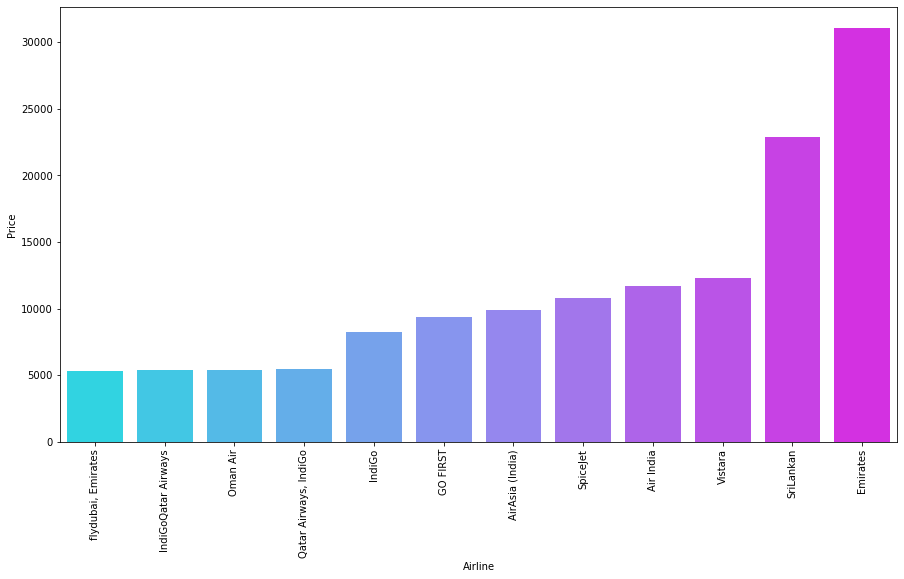

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

In [56]:
pivot = df.pivot_table(values='Price',index='Stops',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Stops,
0,6719.0
1,11952.0


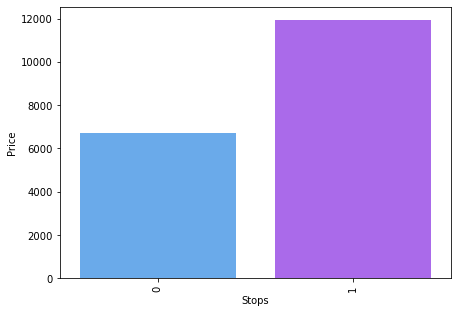

In [57]:
plt.figure(figsize=(7,5))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

In [58]:
pivot = df.pivot_table(values='Price',index='Layover',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Layover,
BDQ,6205.0
-,6719.0
AMD,7533.0
IXU,7575.0
NAG,7594.0
IXR,8247.0
BHO,9202.0
JLR,9510.0
JRG,9613.0


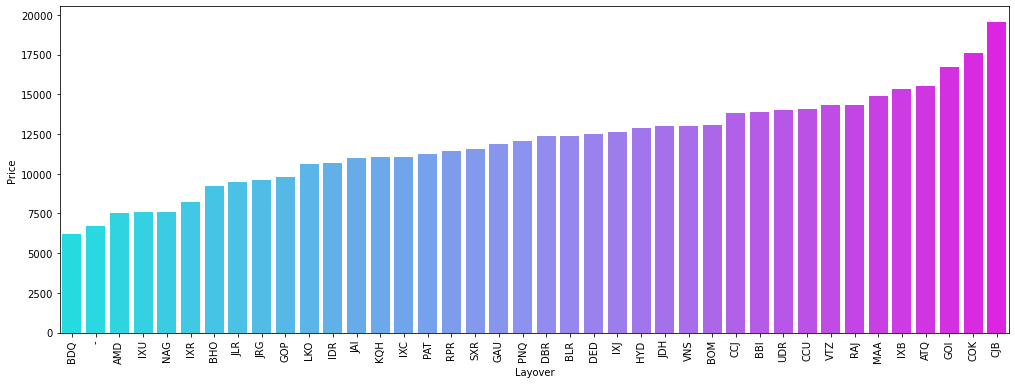

In [59]:
plt.figure(figsize=(17,6))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

In [60]:
pivot = df.pivot_table(values='Price',index='Booking_Travel_Date_Difference',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot,0)
pivot

,Price
Booking_Travel_Date_Difference,
26,11750.0
27,9541.0
28,8786.0


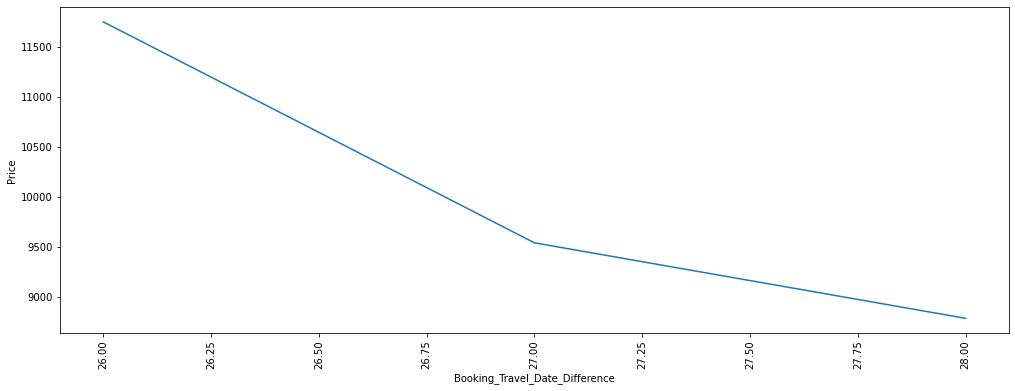

In [61]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

In [62]:
pivot = df.pivot_table(values='Price',index='Dept_day_of_Week',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Dept_day_of_Week,
Wednesday,8786.0
Tuesday,9541.0
Monday,11750.0


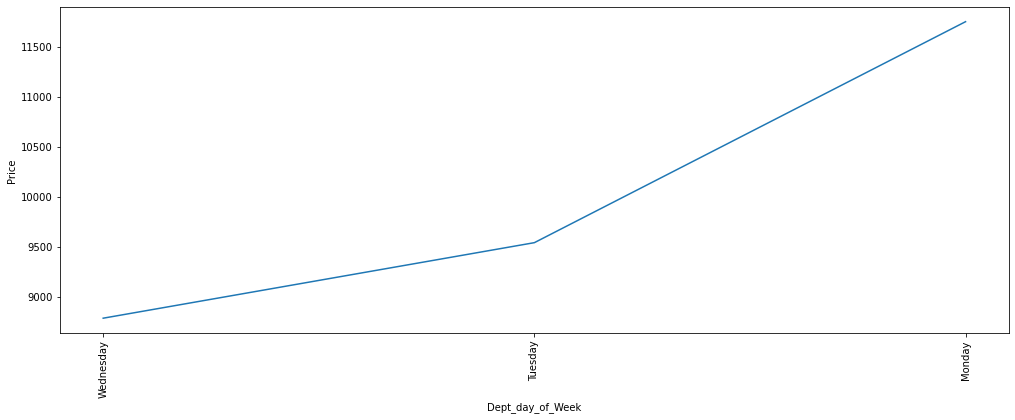

In [63]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

In [64]:
pivot = df.pivot_table(values='Price',index='Departure_Hour',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Departure_Hour,
0,6406.0
2,6542.0
23,7234.0
3,7970.0
22,9560.0
8,9726.0
15,10016.0
6,10194.0
9,10306.0


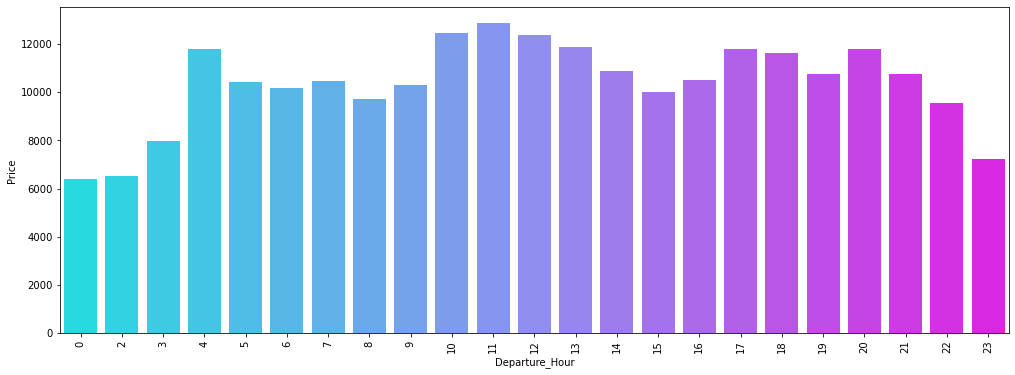

In [65]:
plt.figure(figsize=(17,6))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

In [66]:
pivot = df.pivot_table(values='Price',index='Route',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

,Price
Route,
BOM–DEL,10282.0
DEL–BOM,10841.0
BLR–DEL,12621.0


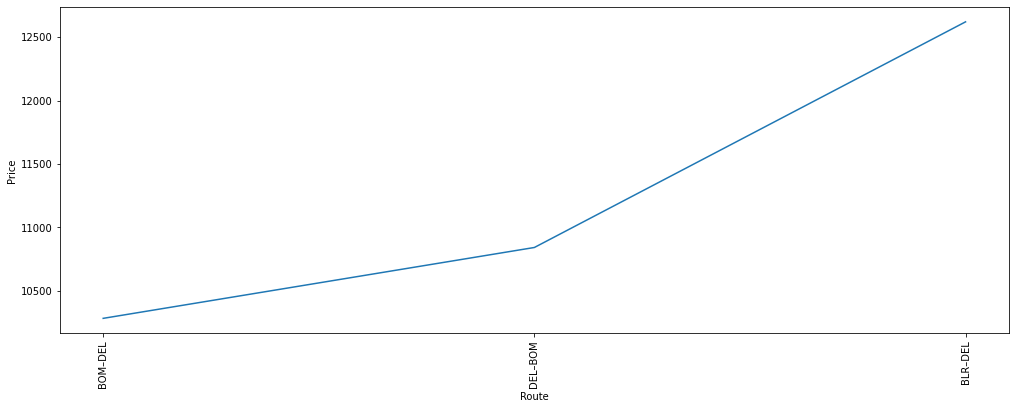

In [67]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

In [68]:
df

,Airline,Duration,Route,Stops,Layover,Price,Booking_Travel_Date_Difference,Dept_day_of_Week,Departure_Hour,Departure_Minute
0,SpiceJet,145,BOM–DEL,0,-,5365,26,Monday,0,35
1,GO FIRST,130,BOM–DEL,0,-,5390,26,Monday,8,5
2,Vistara,125,BOM–DEL,0,-,5717,26,Monday,7,30
3,AirAsia (India),465,BOM–DEL,1,JAI,5164,26,Monday,15,25
4,GO FIRST,125,BOM–DEL,0,-,5390,26,Monday,6,0
...,...,...,...,...,...,...,...,...,...,...
5421,AirAsia (India),175,BLR–DEL,0,-,20569,26,Monday,18,15
5422,SpiceJet,730,BLR–DEL,1,IXB,20690,26,Monday,6,5
5423,Vistara,715,BLR–DEL,1,GOI,21994,26,Monday,12,45
5424,AirAsia (India),650,BLR–DEL,1,COK,22325,26,Monday,10,55


In [69]:
df.dtypes

Airline                           object
Duration                           int32
Route                             object
Stops                              int64
Layover                           object
Price                              int32
Booking_Travel_Date_Difference     int32
Dept_day_of_Week                  object
Departure_Hour                     int32
Departure_Minute                   int32
dtype: object

In [70]:
df = pd.get_dummies(df,columns=['Airline','Dept_day_of_Week','Route','Layover'],drop_first=True)

In [71]:
df

,Duration,Stops,Price,Booking_Travel_Date_Difference,Departure_Hour,Departure_Minute,Airline_AirAsia (India),Airline_Emirates,Airline_GO FIRST,Airline_IndiGo,...,Layover_MAA,Layover_NAG,Layover_PAT,Layover_PNQ,Layover_RAJ,Layover_RPR,Layover_SXR,Layover_UDR,Layover_VNS,Layover_VTZ
0,145,0,5365,26,0,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,0,5390,26,8,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,125,0,5717,26,7,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,465,1,5164,26,15,25,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,125,0,5390,26,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,175,0,20569,26,18,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5422,730,1,20690,26,6,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5423,715,1,21994,26,12,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5424,650,1,22325,26,10,55,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.corr()

,Duration,Stops,Price,Booking_Travel_Date_Difference,Departure_Hour,Departure_Minute,Airline_AirAsia (India),Airline_Emirates,Airline_GO FIRST,Airline_IndiGo,...,Layover_MAA,Layover_NAG,Layover_PAT,Layover_PNQ,Layover_RAJ,Layover_RPR,Layover_SXR,Layover_UDR,Layover_VNS,Layover_VTZ
Duration,1.000000,0.551569,0.382294,-0.032681,0.095704,0.010926,-0.062551,0.034791,-0.131743,-0.308488,...,0.146180,-0.035603,0.019632,0.003335,-0.012823,0.010424,-0.098776,0.084348,-0.001766,0.048060
Stops,0.551569,1.000000,0.500770,-0.023885,0.006515,0.023706,0.052655,0.015297,-0.100228,-0.172673,...,0.093834,0.073787,0.060033,0.067597,0.042856,0.024684,0.094367,0.037556,0.041735,0.032863
Price,0.382294,0.500770,1.000000,-0.278568,0.063704,0.015601,-0.058402,0.146053,-0.106961,-0.318881,...,0.176800,-0.115105,0.009689,0.038349,0.070021,0.006271,0.030537,0.055210,0.042334,0.052930
Booking_Travel_Date_Difference,-0.032681,-0.023885,-0.278568,1.000000,0.026316,-0.059543,0.016655,-0.020185,0.010454,-0.028384,...,-0.019997,-0.017714,-0.019567,-0.089199,0.004917,-0.032572,0.013180,0.023970,-0.007750,-0.023383
Departure_Hour,0.095704,0.006515,0.063704,0.026316,1.000000,0.064206,0.012359,0.036273,-0.041958,-0.064060,...,0.054118,-0.048956,-0.034006,0.000404,-0.018389,-0.029404,-0.115493,-0.007861,-0.018378,-0.018368
Departure_Minute,0.010926,0.023706,0.015601,-0.059543,0.064206,1.000000,-0.058858,0.024346,0.046494,0.072547,...,0.048178,0.020380,0.036983,0.016915,0.022879,0.041402,0.032404,-0.035133,-0.027892,-0.048849
Airline_AirAsia (India),-0.062551,0.052655,-0.058402,0.016655,0.012359,-0.058858,1.000000,-0.007778,-0.076551,-0.130911,...,-0.047713,-0.032172,-0.030525,0.035427,-0.021792,-0.012551,-0.047983,-0.019096,-0.021221,0.018698
Airline_Emirates,0.034791,0.015297,0.146053,-0.020185,0.036273,0.024346,-0.007778,1.000000,-0.009078,-0.015524,...,0.163020,-0.004449,-0.003620,-0.004076,-0.002584,-0.001488,-0.005690,-0.002264,-0.002516,-0.001981
Airline_GO FIRST,-0.131743,-0.100228,-0.106961,0.010454,-0.041958,0.046494,-0.076551,-0.009078,1.000000,-0.152781,...,-0.048222,-0.006320,0.112979,0.005741,-0.009529,-0.014648,0.081306,-0.022287,-0.024767,-0.019502
Airline_IndiGo,-0.308488,-0.172673,-0.318881,-0.028384,-0.064060,0.072547,-0.130911,-0.015524,-0.152781,1.000000,...,-0.092700,0.143910,-0.045444,0.065933,0.010342,0.058667,-0.050541,-0.031980,-0.025776,-0.033350


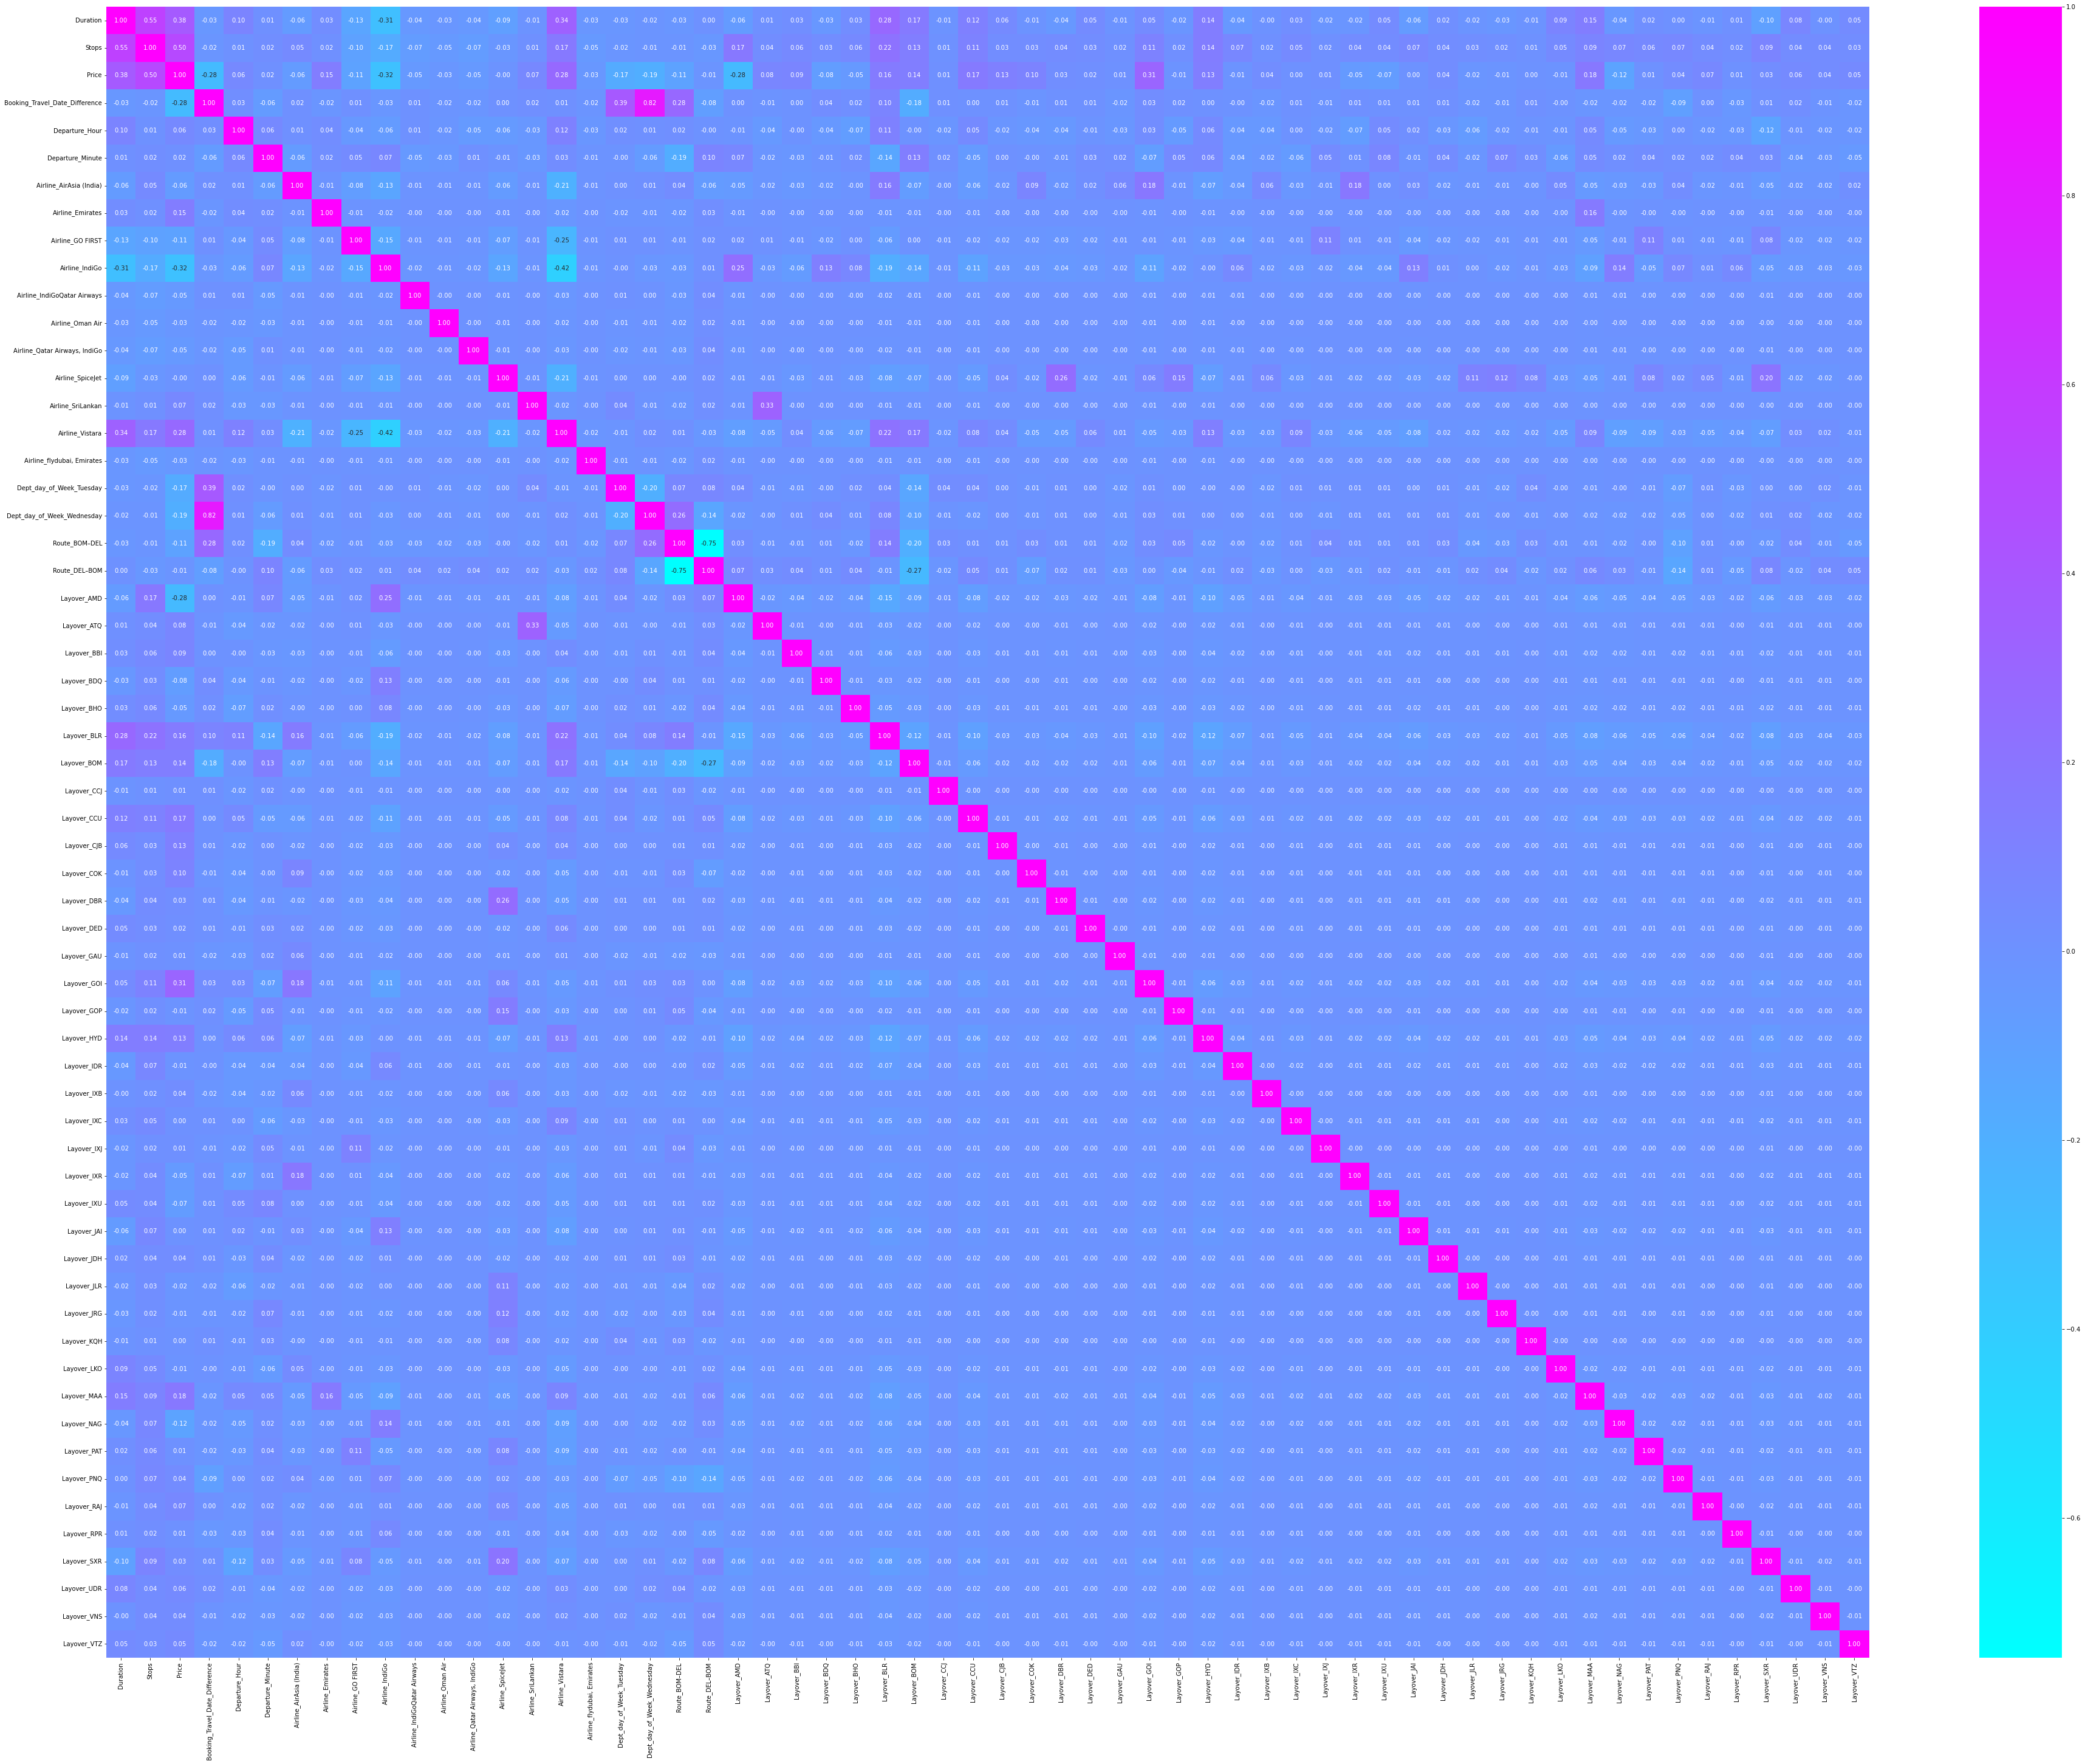

In [73]:
plt.figure(figsize=(65,50))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

In [74]:
df.shape

(5426, 60)

In [75]:
Q3 = df['Price'].quantile(0.75)
Q1 = df['Price'].quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers = df[(df['Price']<lower_limit) | (df['Price']> upper_limit)]
z = outliers.index
df_new = df.drop(z,axis=0)
df_new.shape

(5369, 60)

In [76]:
Q3 = df_new['Duration'].quantile(0.75)
Q1 = df_new['Duration'].quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers = df_new[(df_new['Duration']<lower_limit) | (df_new['Duration']> upper_limit)]
z = outliers.index
df_new = df_new.drop(z,axis=0)
df_new.shape

(5369, 60)

In [78]:
Percentage_Data_Loss = (5426-5369)/5426*100
Percentage_Data_Loss

1.0504976041282712

In [79]:
x = df_new.drop('Price',axis=1)
x.shape

(5369, 59)

In [80]:
y = df_new['Price']
y.shape

(5369,)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [82]:
sc = StandardScaler()
X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Duration,Stops,Booking_Travel_Date_Difference,Departure_Hour,Departure_Minute,Airline_AirAsia (India),Airline_Emirates,Airline_GO FIRST,Airline_IndiGo,Airline_IndiGoQatar Airways,...,Layover_MAA,Layover_NAG,Layover_PAT,Layover_PNQ,Layover_RAJ,Layover_RPR,Layover_SXR,Layover_UDR,Layover_VNS,Layover_VTZ
0,-1.076085,-1.972257,-0.669219,-2.279160,0.524060,-0.251333,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
1,-1.105361,-1.972257,-0.669219,-0.890566,-1.157588,-0.251333,0.0,3.363662,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
2,-1.115120,-1.972257,-0.669219,-1.064140,0.243785,-0.251333,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
3,-0.451513,0.507033,-0.669219,0.324454,-0.036489,3.978784,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
4,-1.115120,-1.972257,-0.669219,-1.237715,-1.437863,-0.251333,0.0,3.363662,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,-0.724763,0.507033,-0.669219,-1.411289,0.243785,3.978784,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
5365,-1.017531,-1.972257,-0.669219,0.845176,-0.597039,3.978784,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
5366,0.065710,0.507033,-0.669219,-1.237715,-1.157588,-0.251333,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592
5367,0.036433,0.507033,-0.669219,-0.196269,1.084609,-0.251333,0.0,-0.297295,-0.51457,-0.036131,...,-0.183013,-0.147288,-0.119827,-0.134929,-0.08554,-0.049266,-0.18838,-0.07496,-0.083302,-0.065592


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [84]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.7045072297829909
At random_state 0 the testing accuracy is 0.7205201785056574

At random_state 1 the training accuracy is 0.716046047242044
At random_state 1 the testing accuracy is 0.699605361653524

At random_state 2 the training accuracy is 0.7193800586899056
At random_state 2 the testing accuracy is 0.6881989409136124

At random_state 3 the training accuracy is 0.7063019705374641
At random_state 3 the testing accuracy is 0.7215672299854714

At random_state 4 the training accuracy is 0.71490278695389
At random_state 4 the testing accuracy is -1.0971283096348594e+18

At random_state 5 the training accuracy is 0.7214666122963256
At random_state 5 the testing accuracy is 0.6854858235870915

At random_state 6 the training accuracy is 0.712033978847026
At random_state 6 the testing accuracy is 0.7033845053663057

At random_state 7 the training accuracy is 0.7115756241524357
At random_state 7 the testing accuracy is 0.7101930657296713

At rando

At random_state 65 the training accuracy is 0.7099105411502955
At random_state 65 the testing accuracy is 0.7145528319712592

At random_state 66 the training accuracy is 0.711454720314997
At random_state 66 the testing accuracy is -2.2594967797620323e+27

At random_state 67 the training accuracy is 0.7110566947850571
At random_state 67 the testing accuracy is 0.7048089840346125

At random_state 68 the training accuracy is 0.7125778913815148
At random_state 68 the testing accuracy is 0.7060809149655917

At random_state 69 the training accuracy is 0.7085657843148782
At random_state 69 the testing accuracy is 0.716697735827991

At random_state 70 the training accuracy is 0.7177531012434566
At random_state 70 the testing accuracy is 0.6911627343063143

At random_state 71 the training accuracy is 0.7181235075103181
At random_state 71 the testing accuracy is 0.6952235750107566

At random_state 72 the training accuracy is 0.7234606778370848
At random_state 72 the testing accuracy is 0.6805962

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.6881989409136124


In [86]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(62,81,2):
    cv_score = cross_val_score(lr,X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 62 the cv score is -0.4494861239543338 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 64 the cv score is -1.325251343273781 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 66 the cv score is -0.9142453993362128 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 68 the cv score is -1.1823414278127427 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 70 the cv score is -1.352355185764719 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 72 the cv score is -1.267527914599495 and the accuracy score for training is -0.7535183783025792 and the accuracy for testing is 0.6881989409136124

At cross fold 74 th

In [87]:
def Model_reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv=74)
    cv_score = cv_score.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    plt.figure(figsize=(20,6))
    coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    plt.xticks(rotation=90)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [88]:
def Model_tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv=74)
    cv_score = cv_score.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    plt.figure(figsize=(20,6))
    coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report :-
RMSE 2143.9600568725723
MAE 1545.3499662416486
r2_score : 68.81989409136125
cv_score : -289.3490613879849
Difference between r2_score and cv is  358.1689554793461


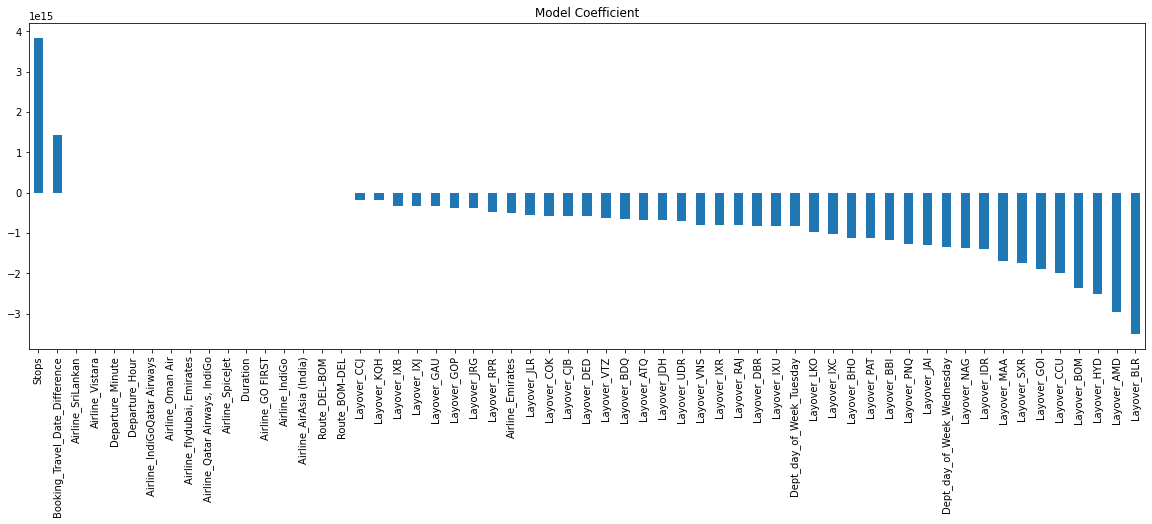

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Model_reg(lr)

Model Report :-
RMSE 2143.9338375490843
MAE 1545.0936247491961
r2_score : 68.82065671404321
cv_score : -288.065846182562
Difference between r2_score and cv is  356.8865028966052


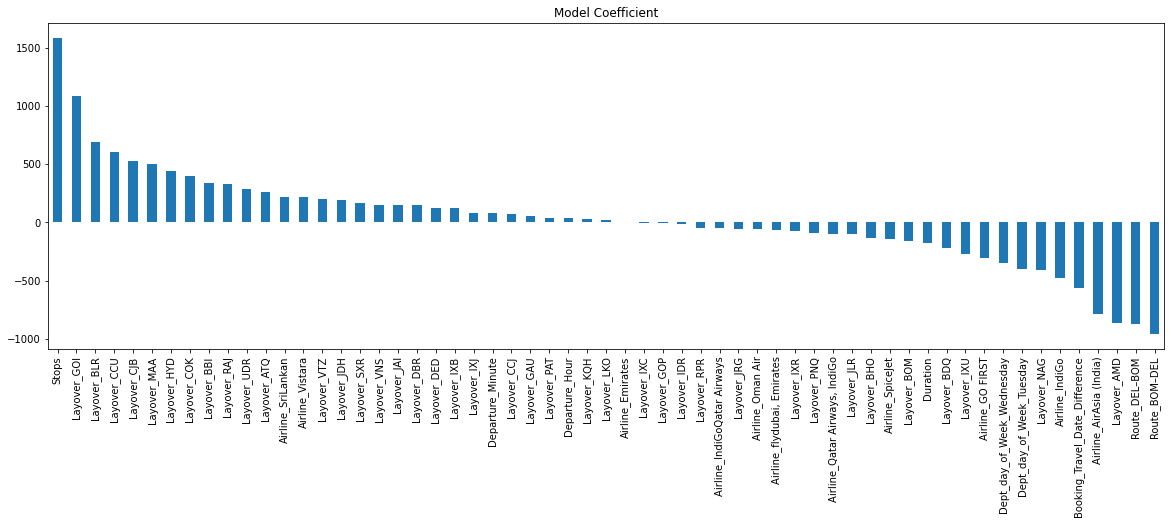

In [90]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_reg(ridge)

Model Report :-
RMSE 2143.9529005172953
MAE 1545.5874682833712
r2_score : 68.82010224406663
cv_score : -289.05028065462324
Difference between r2_score and cv is  357.87038289868985


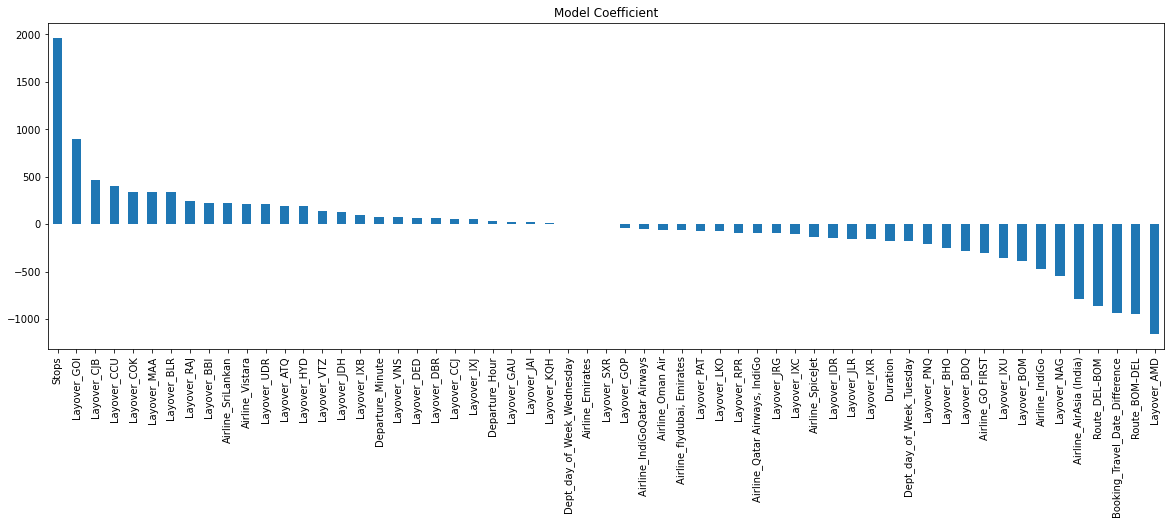

In [91]:
from sklearn.linear_model import Lasso
lasso = Lasso()
Model_reg(lasso)

Model Report :-
RMSE 2377.146424435179
MAE 1795.4017850020005
r2_score : 61.668477148464085
cv_score : -859.2838379662171
Difference between r2_score and cv is  920.9523151146811


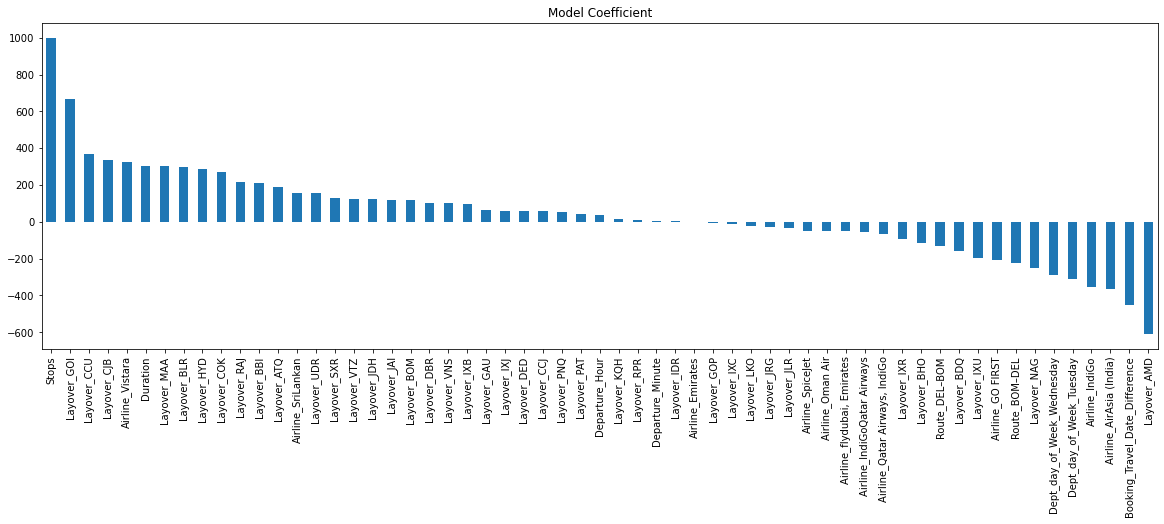

In [92]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
Model_reg(en)

Model Report :-
RMSE 845.4064805278203
MAE 175.83426443202978
r2_score : 95.15185778006821
cv_score : 62.454291920030904
Difference between r2_score and cv is  32.69756586003731


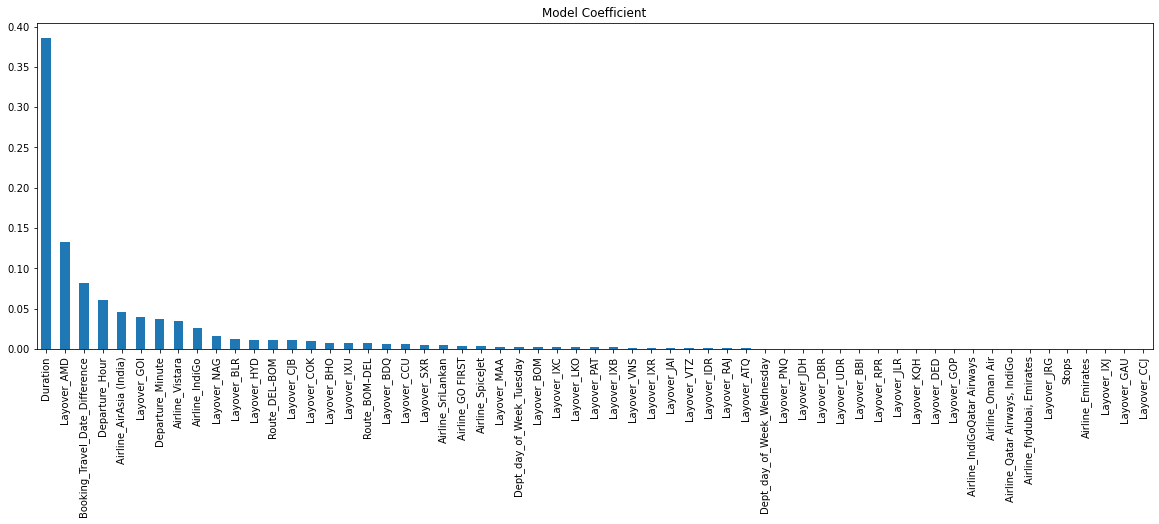

In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
Model_tree(dt)

Model Report :-
RMSE 812.2905922837805
MAE 341.24446513552664
r2_score : 95.52423729767784
cv_score : 59.438710929944996
Difference between r2_score and cv is  36.08552636773285


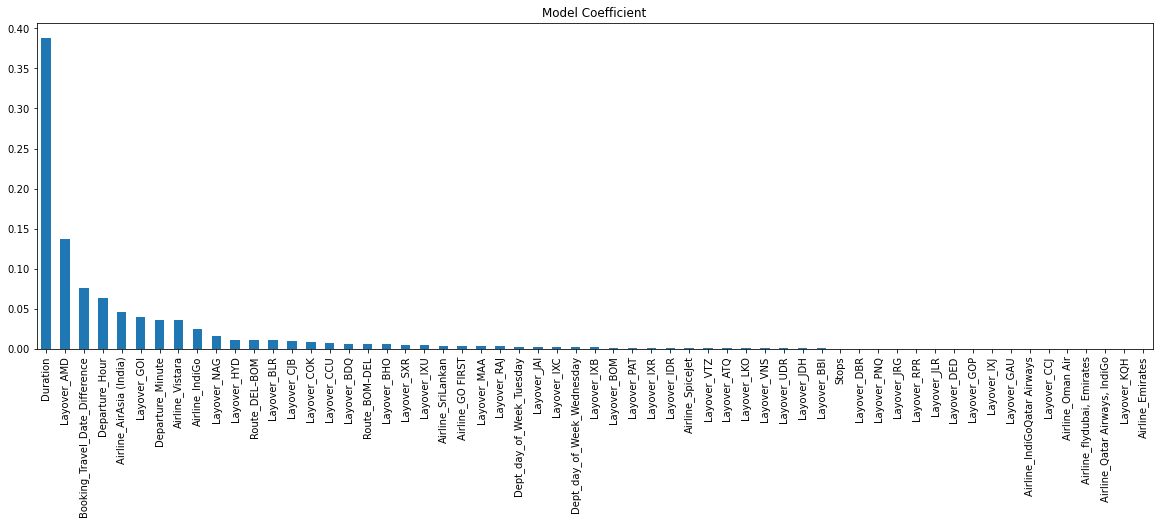

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
Model_tree(rf)

Model Report :-
RMSE 1890.1151111452452
MAE 1330.7736777159635
r2_score : 75.76624490807336
cv_score : -170.0793391249583
Difference between r2_score and cv is  245.84558403303166


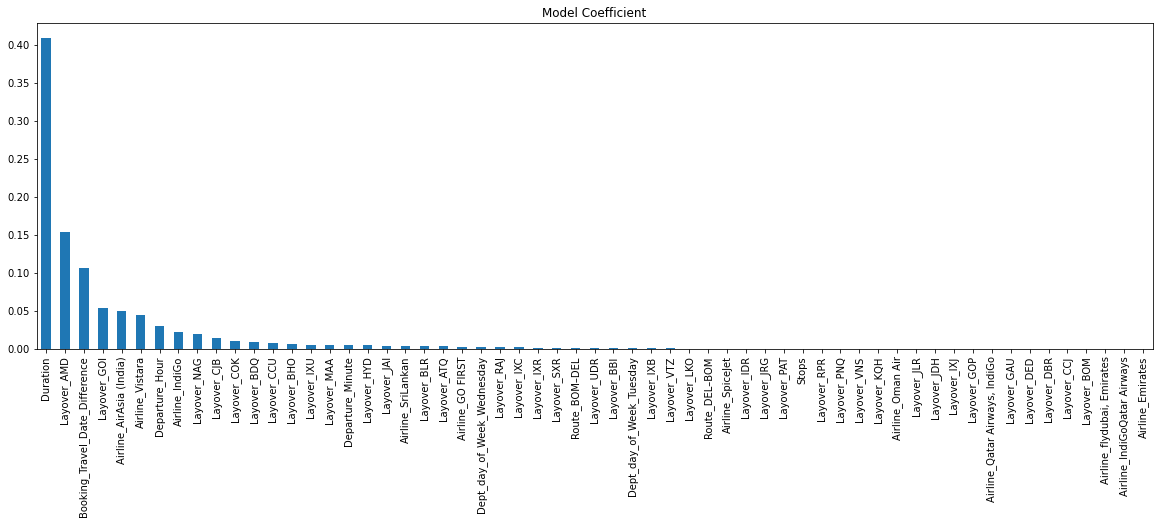

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
Model_tree(gbr)

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {'solver' : ['auto', 'svd', 'cholesky', 'lsqr'],
              'alpha':[0.001,0.01,0.1, 1]}

gcv = GridSearchCV(ridge,parameters,cv=78,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 1, 'solver': 'auto'}

In [99]:
gcv.best_estimator_

Ridge(alpha=1)

Model Report :-
RMSE 2143.9338375490843
MAE 1545.0936247491961
r2_score : 68.82065671404321
cv_score : -288.065846182562
Difference between r2_score and cv is  356.8865028966052


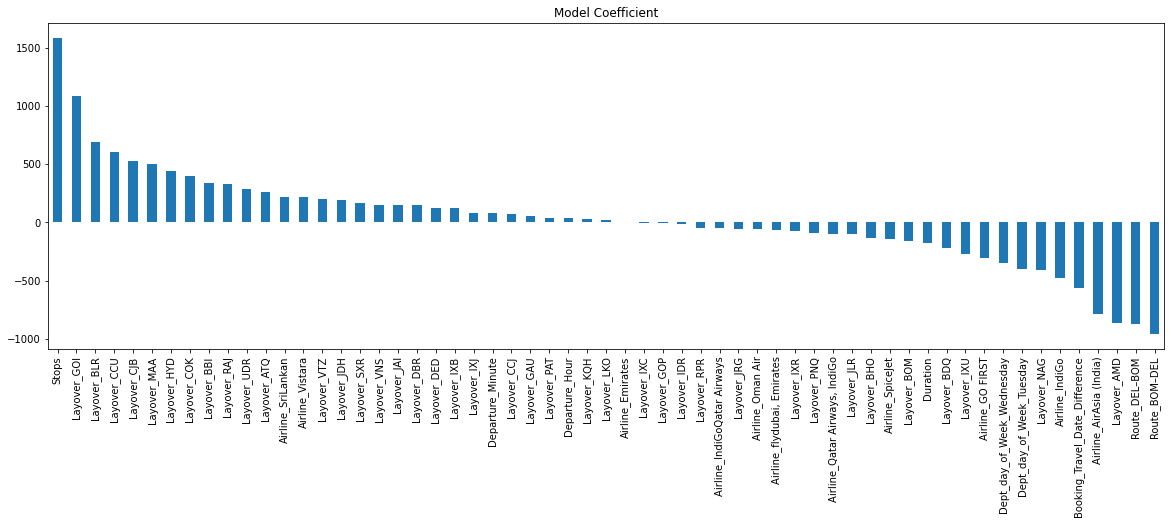

In [100]:
ridge = Ridge(alpha=1)

Model_reg(ridge)

In [101]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate':[0.01,0.1,1],
             'n_estimators':list(range(50,200,50)),
             'max_depth':[3,4,5]}
gcv = GridSearchCV(gbr,parameters,cv=78,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 150}

In [102]:
gcv.best_estimator_

GradientBoostingRegressor(learning_rate=1, max_depth=5, n_estimators=150)

Model Report :-
RMSE 825.9383703774915
MAE 286.5991066934748
r2_score : 95.37257390800609
cv_score : 52.646489481552514
Difference between r2_score and cv is  42.726084426453575


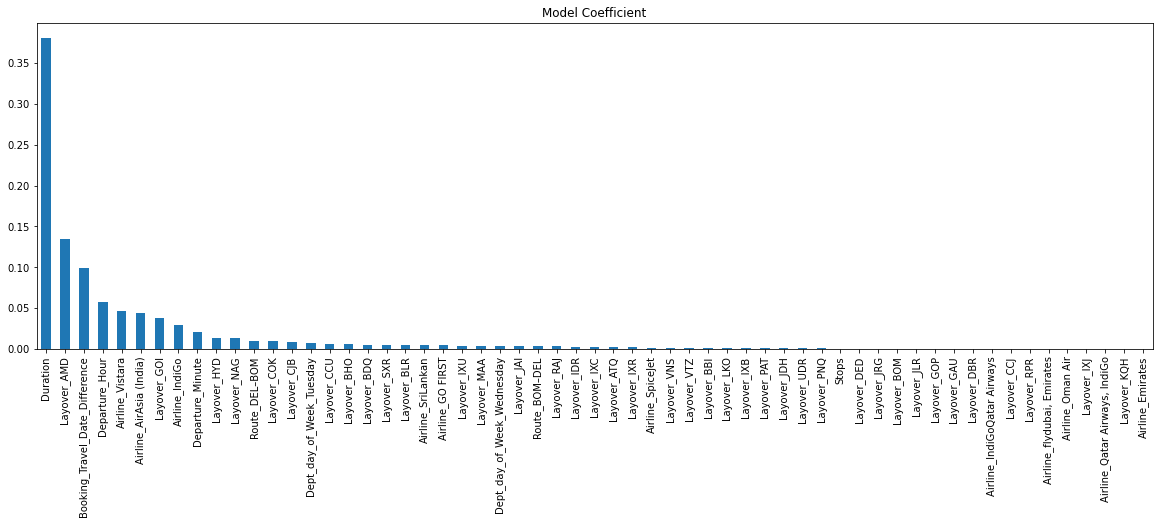

In [103]:
gbr = gcv.best_estimator_
Model_tree(gbr)

Model Report :-
RMSE 1890.66722083884
MAE 1331.2350244366228
r2_score : 75.75208529932947
cv_score : -170.03831991970097
Difference between r2_score and cv is  245.79040521903045


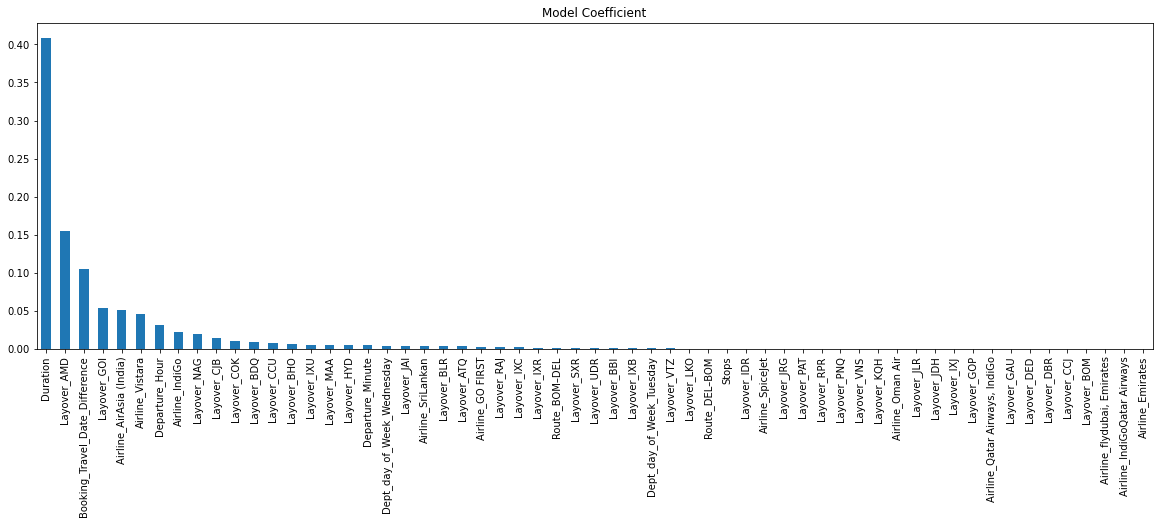

In [104]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred = gbr.predict(x_test)
cv_score = cross_val_score(gbr,x,y,cv=74)
cv_score = cv_score.mean()*100
print('Model Report :-')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('MAE', mean_absolute_error(y_test,pred))
r2_Score = r2_score(y_test,pred)*100
print('r2_score :', r2_Score)
print('cv_score :', cv_score)
plt.figure(figsize=(20,6))
coef = pd.Series(gbr.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title = 'Model Coefficient')
print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [107]:
df_pred = pd.DataFrame()
df_pred['Actual']=y_test
df_pred['Prediction'] = pred
df_pred['% Difference'] = (df_pred['Actual']-df_pred['Prediction'])/df_pred['Actual']*100
df_pred

,Actual,Prediction,% Difference
2410,5912,6647.986603,-12.449029
1893,11941,10392.508570,12.967854
1757,5970,6464.862085,-8.289147
3571,6741,6990.804043,-3.705742
632,10383,11498.485645,-10.743385
...,...,...,...
665,11292,11304.088516,-0.107054
5197,8988,9222.360420,-2.607481
1942,5819,8410.494979,-44.535057
2053,12120,10430.874044,13.936683


In [108]:
df_pred.to_csv('Flight_Price_Predicted.csv')

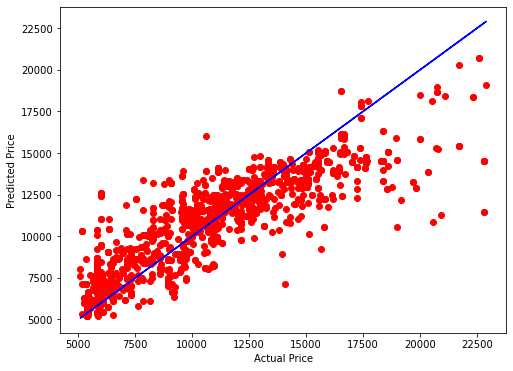

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=df_pred['Actual'],y = df_pred['Prediction'],color='r')
plt.plot(df_pred['Actual'],df_pred['Actual'],color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [110]:
import pickle

In [111]:
file_name = 'FLIGHT_PRICE_PREDICTION.pkl'
pickle.dump(gbr,open(file_name,'wb'))